# Introduction

This notebook shows how to reproduce online Ethereum profitability calculator.

# Calulation Example 1

Original source for this calculation:

* https://ethereum.stackexchange.com/questions/11380/whats-the-formula-to-calculate-the-mining-profitability-for-etc

Steps to replicate:

* ignore snippet on the forum, it is quite old, instead follow the link to calculator source
  * https://github.com/badmofo/ethereum-mining-calculator - open index.html and see embedded JavaScript

```
  $scope.ethPrice = ethereumStats.priceUsd;
  $scope.netHashGH = (ethereumStats.difficulty / ethereumStats.blockTime) / 1e9;
  $scope.blockTime = ethereumStats.blockTime;
  $scope.earnings = {};

  $scope.computeProfits = function() {
    var userRatio = $scope.userHash * 1e6 / ($scope.netHashGH * 1e9);
    var blocksPerMin = 60.0 / $scope.blockTime;
    var blockReward = 3.0;
    var ethPerMin = blocksPerMin * blockReward;
    $scope.earnings.min = userRatio * ethPerMin;
    $scope.earnings.hour = $scope.earnings.min * 60;
    $scope.earnings.day = $scope.earnings.hour * 24;
    $scope.earnings.week = $scope.earnings.day * 7;
    $scope.earnings.month = $scope.earnings.day * 30;
    $scope.earnings.year = $scope.earnings.day * 365;
  };
```

* run live caluclator on the website to get exact input variables
  * https://badmofo.github.io/ethereum-mining-calculator/
  * here is what I got during testing

---

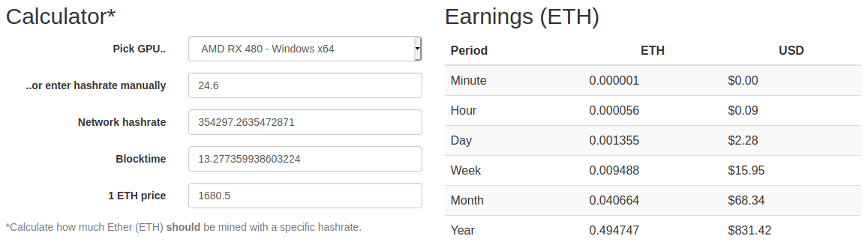

---

In [77]:
# very rought data for 6 Feb 2021
eth_price_usd = 1_680.5
eth_difficulty = 4_676_723_878_824_190.00   # 4.7P
block_time_sec = 13.277359938603224
block_reward = 3.0
user_hashrate = 24.6    # * 1e6   # 20GH, e.g. AMD RX 580 GPU

In [78]:
net_hash_GH = (eth_difficulty / eth_block_time) / 1e9
net_hash_GH

354297.26354728715

In [79]:
user_ratio = user_hashrate * 1e6 / (net_hash_GH * 1e9)
user_ratio

6.943322043670457e-08

In [80]:
blocks_per_min = 60.0 / block_time_sec
blocks_per_min

4.518970659637927

In [81]:
eth_per_min = blocks_per_min * block_reward
eth_per_min

13.556911978913782

In [82]:
earnings_min = user_ratio * eth_per_min
earnings_min

9.413000578729213e-07

In [83]:
earnings_day = earnings_min * 60 * 24
earnings_day

0.0013554720833370067

In [85]:
dollars_day = earnings_day * eth_price_usd
dollars_day

2.27787083604784

Result matches result from the online calculator: $2.28

# Calculation - Example 2

Source for this section:

* https://www.reddit.com/r/EtherMining/comments/6v99u6/whats_the_formula_to_calculate_eth_mining_reward/

The snipped on the forum:

`((hashrate [h/s] * reward) / difficulty) * (1 - poolfee) * 3600 * 24 = reward in coins per day`

Note this is exactly the same calculation as one in Example 1 above, only simplified.

In [88]:
reward_in_conis_per_day = (user_hashrate * 1e6 * block_reward) / eth_difficulty * 3600 * 24
reward_in_conis_per_day

0.0013634159649389258

# Calculation - Example 3

Source for this section:

* https://medium.com/spreadstreet/how-to-create-an-ethereum-mining-calculator-from-start-to-finish-71bcb87877a0

In [90]:
# TODO: leave for now, examples 1) and 2) show same result

# Helper Function

Wrap into easy to use function

In [1]:
def income_coins_per_day(user_hashrate, block_reward, difficulty):
    """Calculate amount of coin earned in a day
    
    Params:
        user_hashrate - GPU hasrate, e.g. RX 580 Ethereum Hashrate is 24_000_000 (24MH)
        block_reward - Ethereum block reward as of Jan 2021 is 3.0 ETH
        difficulty - Ethereum difficulty as of Jan 2021 is 4_676_723_878_824_190.00 (4.7P)

    Example (valid for ETH on 6 Feb 2021)
        >>> income_coins_per_day(user_hashrate=24_000_000,
                                 block_reward=3.0,
                                 difficulty=4_676_723_878_824_190.00)
        0.0013634159649389258
    """
    reward_in_conis_per_day = (user_hashrate * block_reward) / eth_difficulty * 3600 * 24